#### Data Description

The client will send data in multiple sets of files in batches at a given location. The data has been extracted from the census bureau. 
The data contains 32561 instances with the following attributes :
`Features`:

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … - 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

Target Label:
Whether a person shall default in the credit card payment or not.

- default.payment.next.month: Default payment (1=yes, 0=no)


   

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

import warnings; warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_excel("data/default of credit card clients.xls")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print("Size of dataset : ",df.shape)
df.info()

Size of dataset :  (30000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30

- No nan value present in dataset
- `SEX`, `EDUCATION`, `MARRIAGE`, `PAY_0`, `PAY_2`, `PAY_3`,`PAY_4`, `PAY_5`, `PAY_6`and `default payment next month` are categorical columns

In [4]:
print(" Unique value in SEX column :", pd.unique(df['SEX']))
print(" Unique value in EDUCATION column :", pd.unique(df['EDUCATION']))
print(" Unique value in MARRIAGE column :", pd.unique(df['MARRIAGE']))
print(" Unique value in AGE column :", pd.unique(df['AGE']))
print(" Unique value in PAY_0 column :", pd.unique(df['PAY_0']))
print(" Unique value in PAY_2 column :", pd.unique(df['PAY_2']))
print(" Unique value in PAY_3 column :", pd.unique(df['PAY_3']))
print(" Unique value in PAY_4 column :", pd.unique(df['PAY_4']))
print(" Unique value in PAY_5 column :", pd.unique(df['PAY_5']))
print(" Unique value in PAY_6 column :", pd.unique(df['PAY_6']))
print(" Unique value in default payment next month column :", pd.unique(df['default payment next month']))

 Unique value in SEX column : [2 1]
 Unique value in EDUCATION column : [2 1 3 5 4 6 0]
 Unique value in MARRIAGE column : [1 2 3 0]
 Unique value in AGE column : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
 Unique value in PAY_0 column : [ 2 -1  0 -2  1  3  4  8  7  5  6]
 Unique value in PAY_2 column : [ 2  0 -1 -2  3  5  7  4  1  6  8]
 Unique value in PAY_3 column : [-1  0  2 -2  3  4  6  7  1  5  8]
 Unique value in PAY_4 column : [-1  0 -2  2  3  4  5  7  6  1  8]
 Unique value in PAY_5 column : [-2  0 -1  2  3  5  4  7  8  6]
 Unique value in PAY_6 column : [-2  2  0 -1  3  6  4  7  8  5]
 Unique value in default payment next month column : [1 0]


- In `EDUCATION` cloumn 4,5,6,0 represent same thing **other/Unknown** they could be combined as one.
- `PAY_0`,`PAY_2`, `PAY_3`,`PAY_4`, `PAY_5`, `PAY_6` contain non defined values like 0,-2 they should be fixed 

In [5]:
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

- imbalaced dataset, 1(Yes) is more in taget column

In [6]:
def fix_ed(ed):
    if ed == 5:
        ed = 4
    elif ed == 6:
        ed = 4
    elif ed == 0:
        ed = 4
    return ed

In [7]:
df['EDUCATION'] = df['EDUCATION'].apply(fix_ed)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
cat_data = df[["SEX","EDUCATION",'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
numdata = df.drop(labels=["SEX","EDUCATION",'MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month'], axis=1)

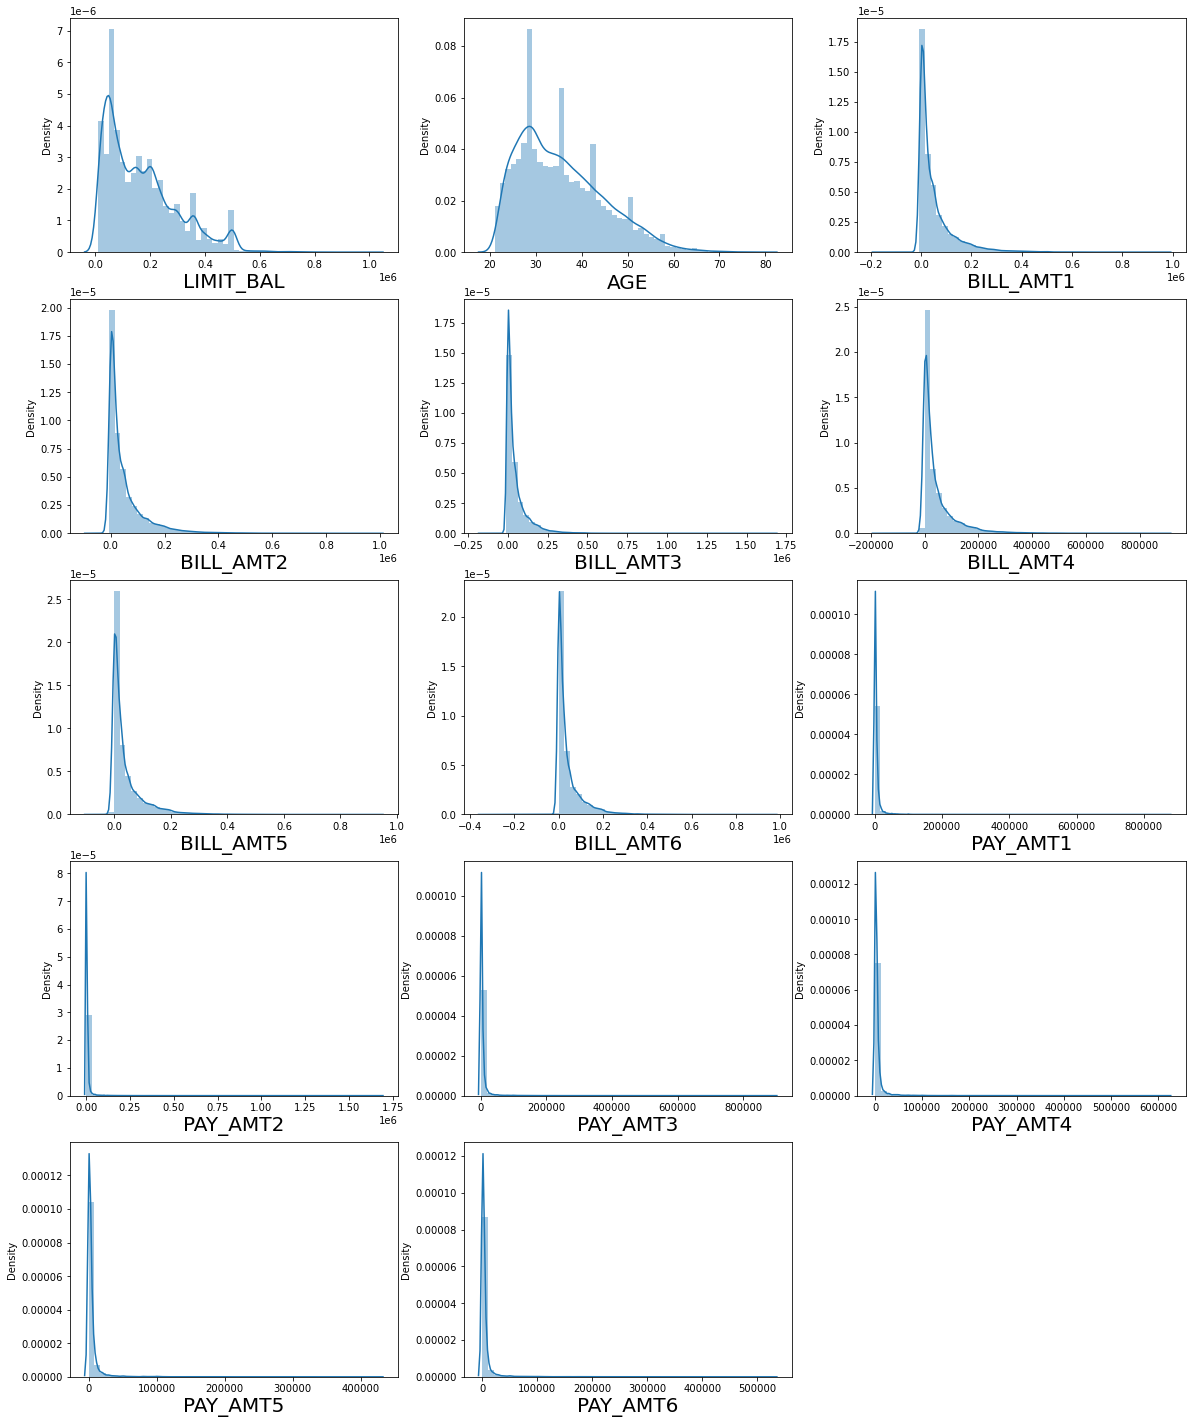

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numdata:
    if plotnumber<=14 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

- mostly all columns contain outliers

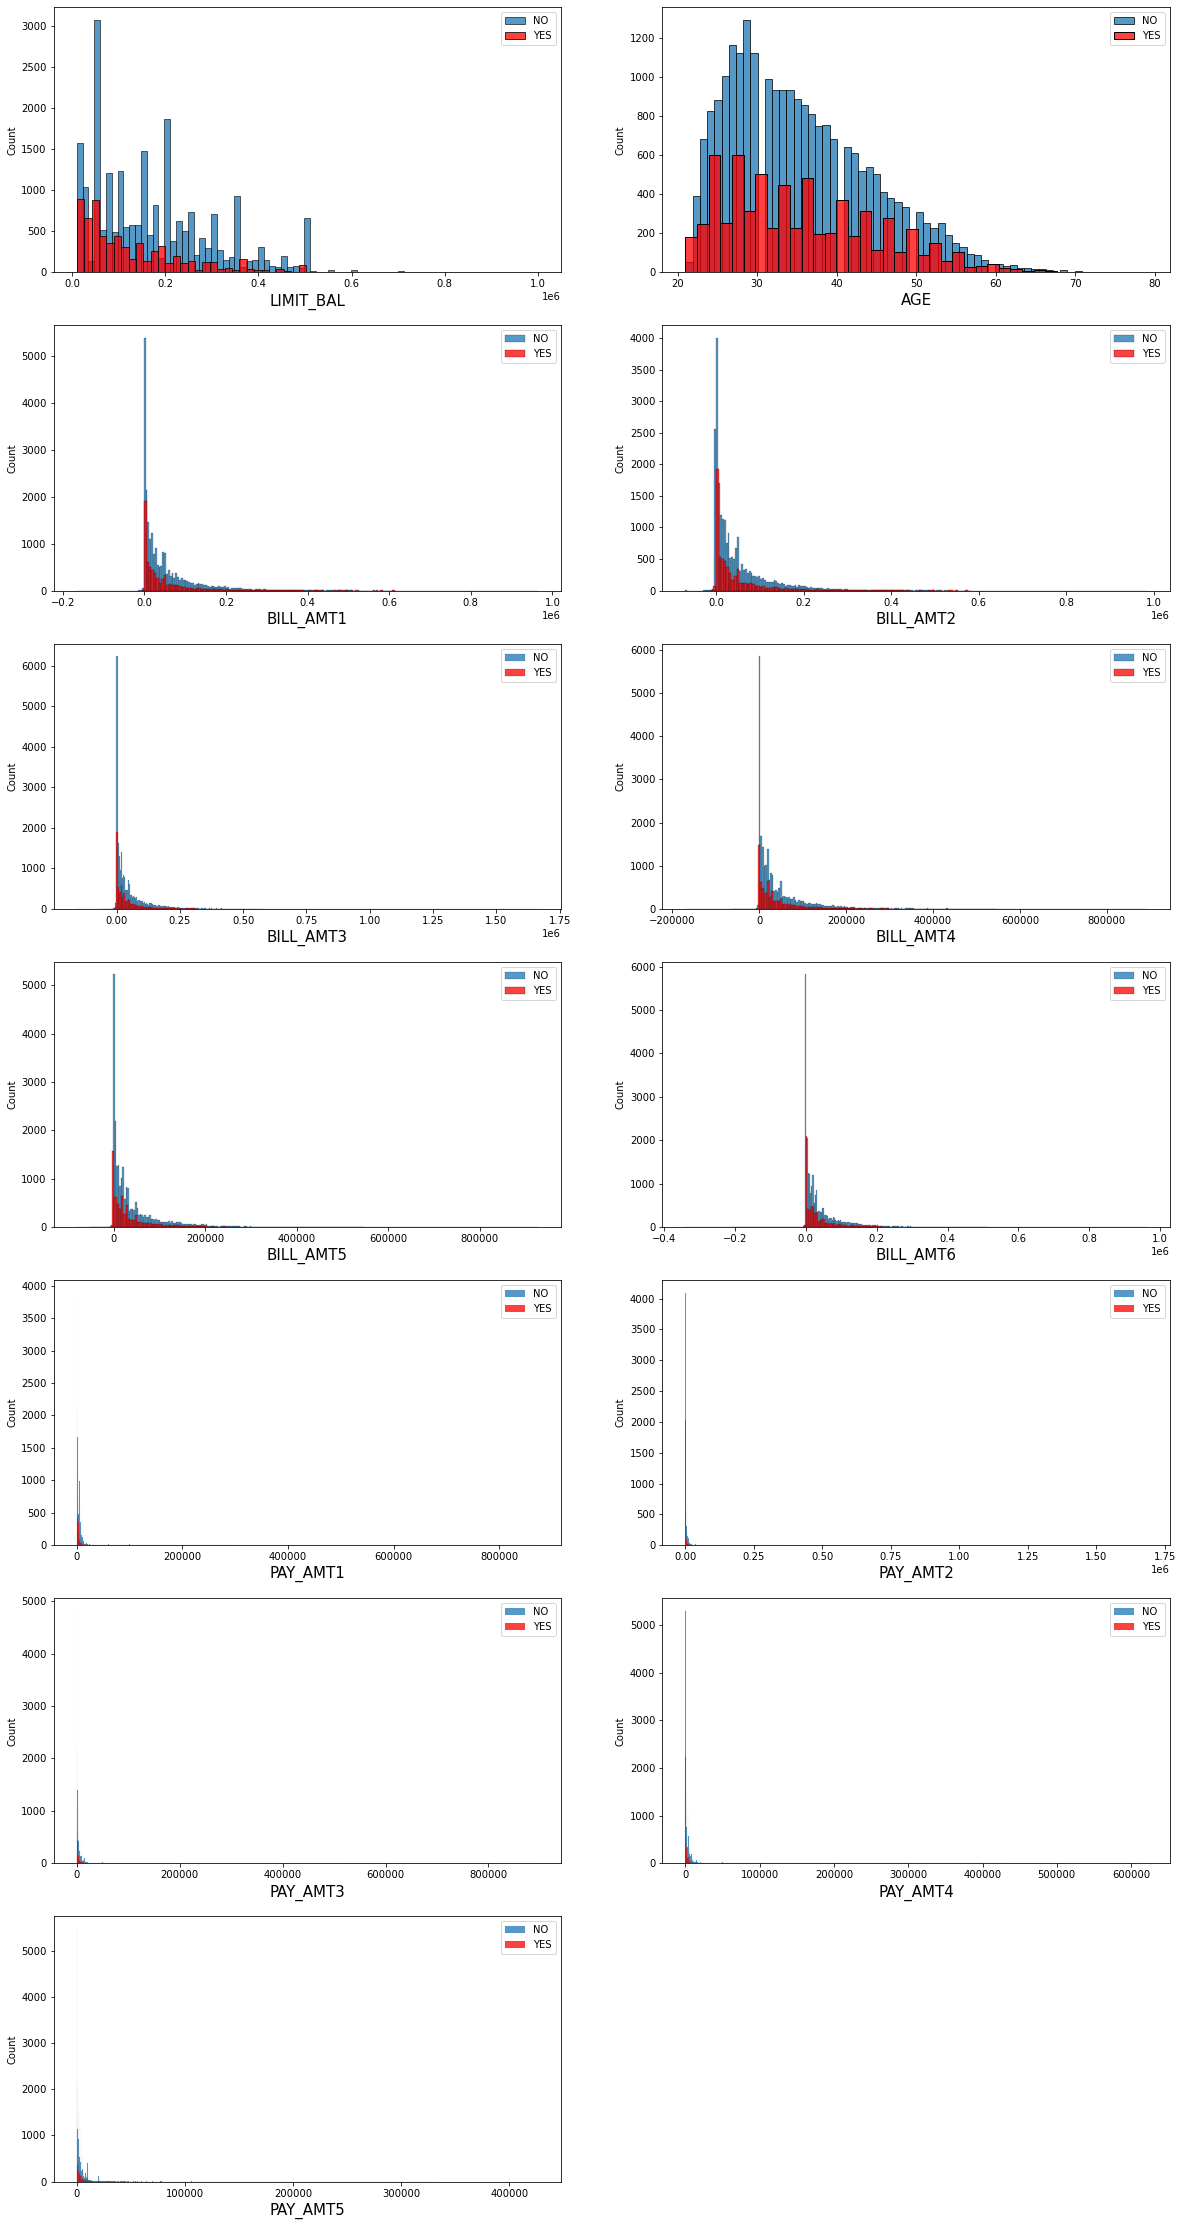

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in numdata:
    if plotnumber<=13 :
        ax = plt.subplot(7,2,plotnumber)
        sns.histplot(df[df['default payment next month']== 0 ][column])
        sns.histplot(df[df['default payment next month']== 1 ][column], color="red",)
        plt.xlabel(column,fontsize=15)
        plt.legend(labels=["NO","YES"])
        
    plotnumber+=1
plt.show()

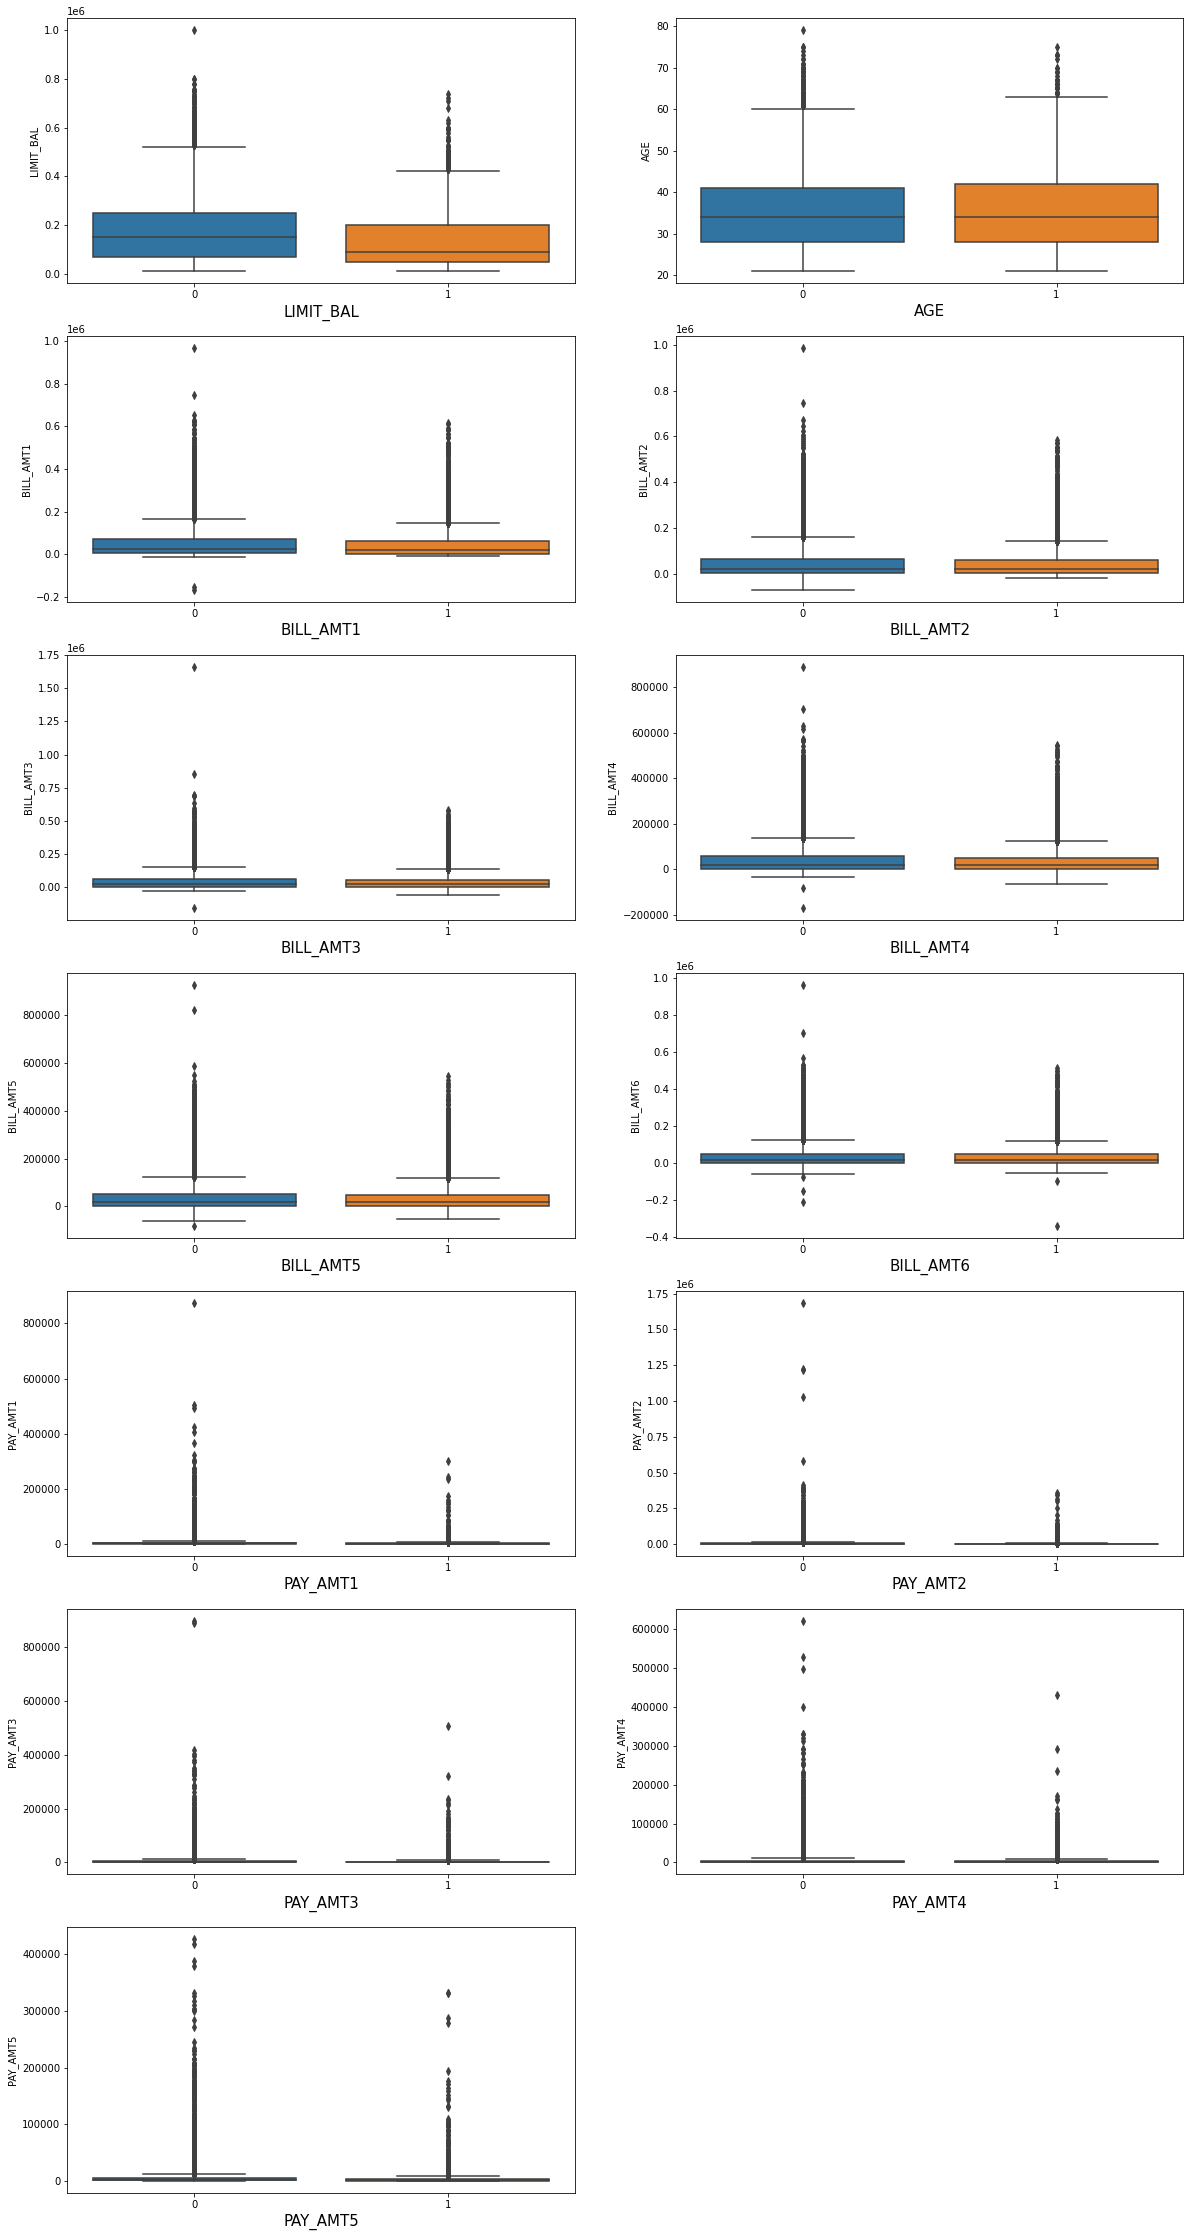

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in numdata:
    if plotnumber<=13 :
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(data=df, x='default payment next month', y=column)
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

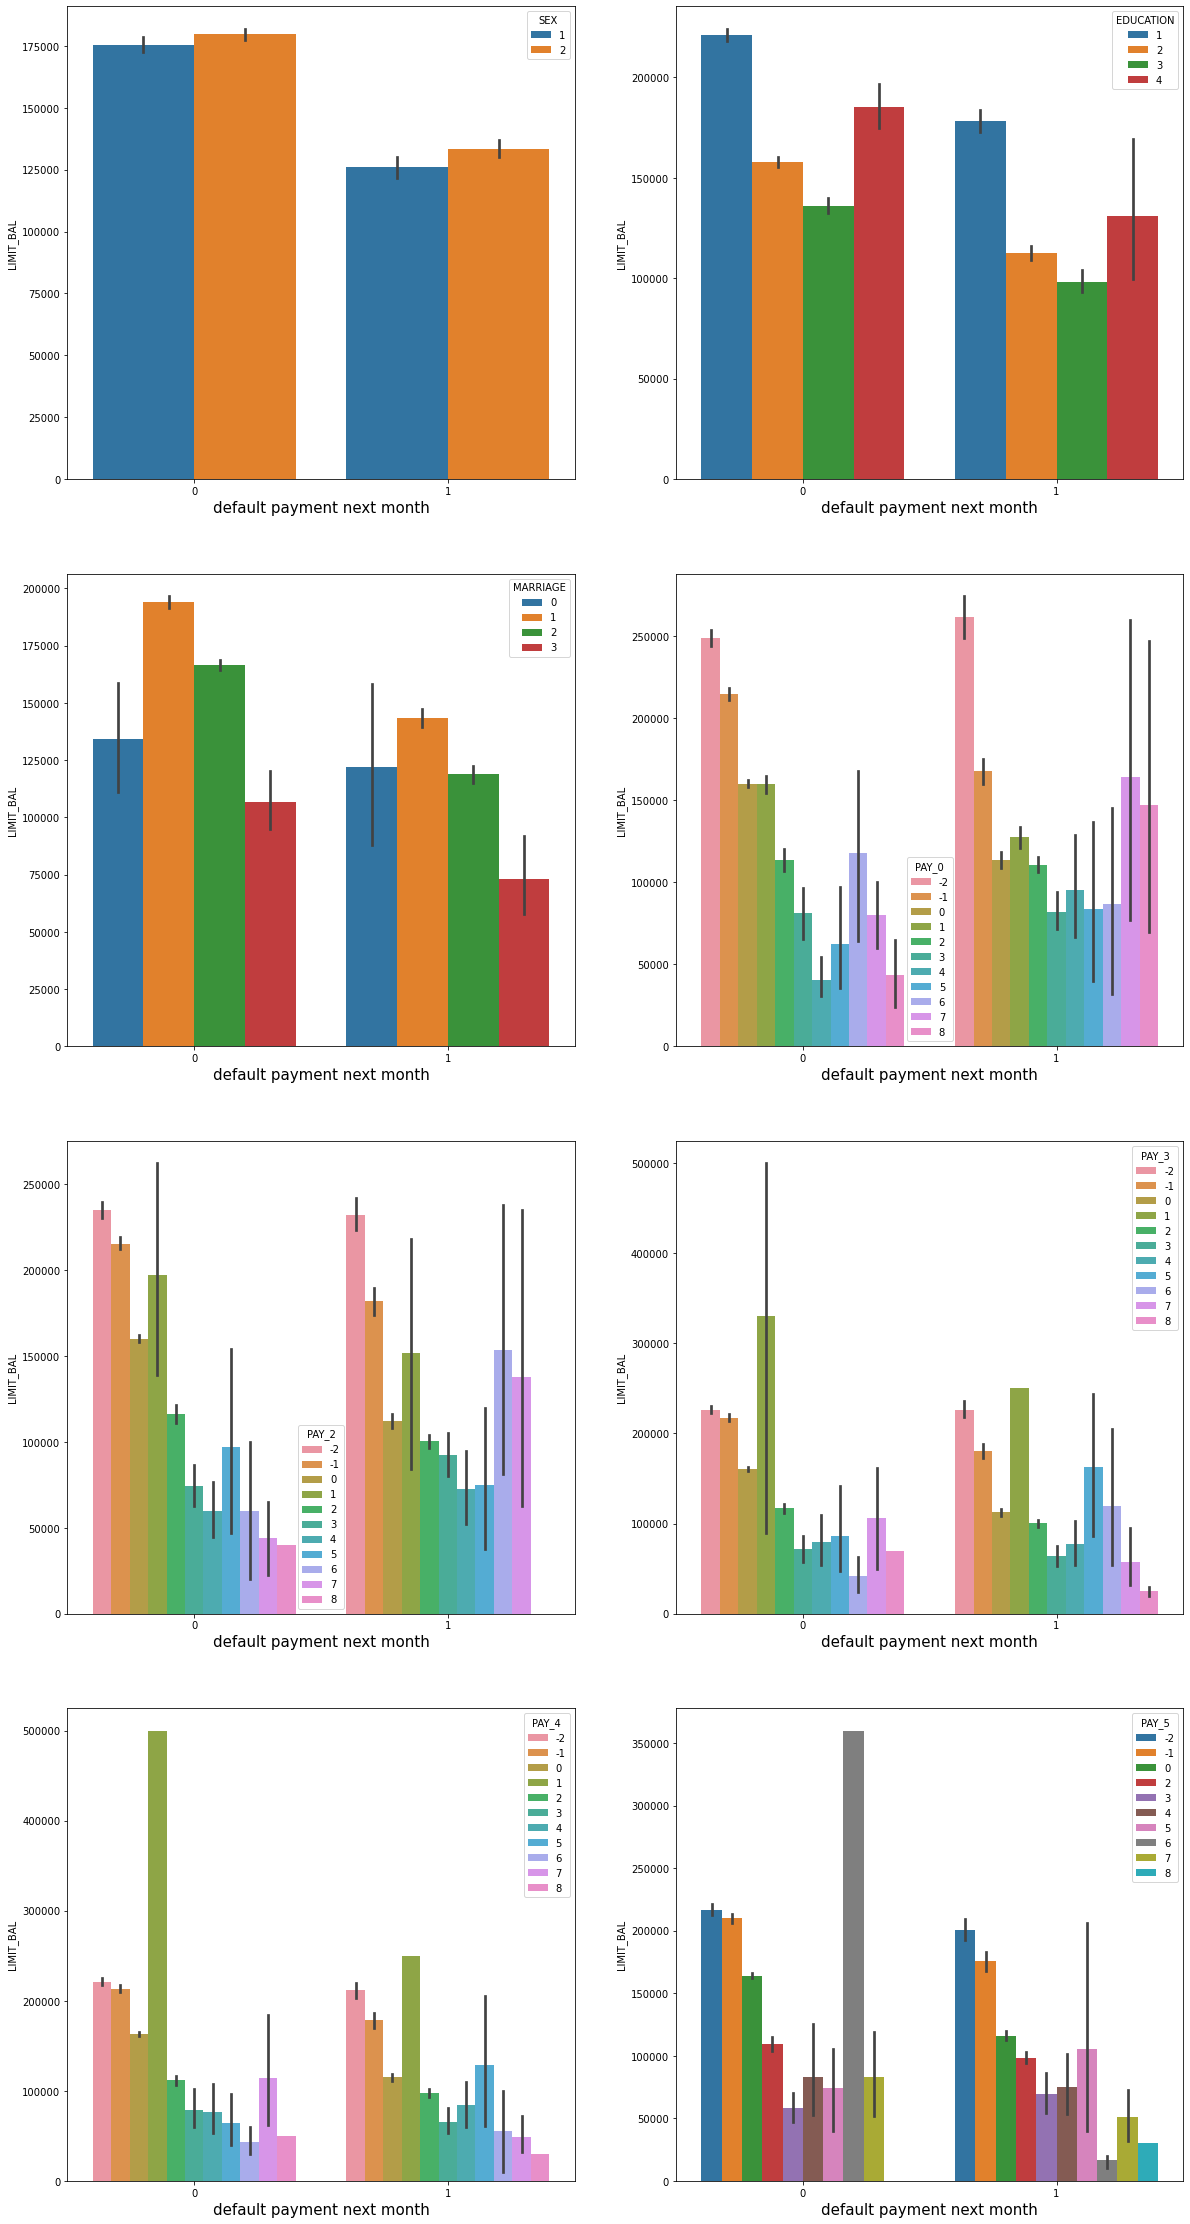

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in cat_data:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.barplot(x="default payment next month", y="LIMIT_BAL", data=df, hue=column)
        plt.xlabel("default payment next month",fontsize=15)
        
    plotnumber+=1
plt.show()

In [14]:
def f(age):
    if (age >=20) and (age <=40):
        age = '20-40'
    elif (age >=41) and (age <=60):
        age = '41-60'
    elif (age >=61) and (age <=80):
        age = '61-80'
    return age

([<matplotlib.patches.Wedge at 0x2d3c5752910>,
 [Text(-0.7122884067529766, 0.8382393605679146, ''),
  Text(0.6881264738651279, -0.8581852690217571, ''),
  Text(1.099553800330368, -0.03132794565631959, '')],
 [Text(-0.3885209491379872, 0.45722146940068065, '72.42'),
  Text(0.3753417130173425, -0.46810105583004924, '26.67'),
  Text(0.5997566183620189, -0.0170879703579925, '0.91')])

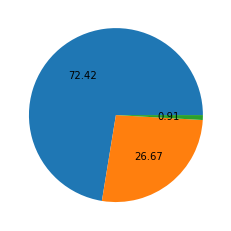

In [15]:
plt.pie(df['AGE'].apply(f).value_counts(), autopct="%.2f")

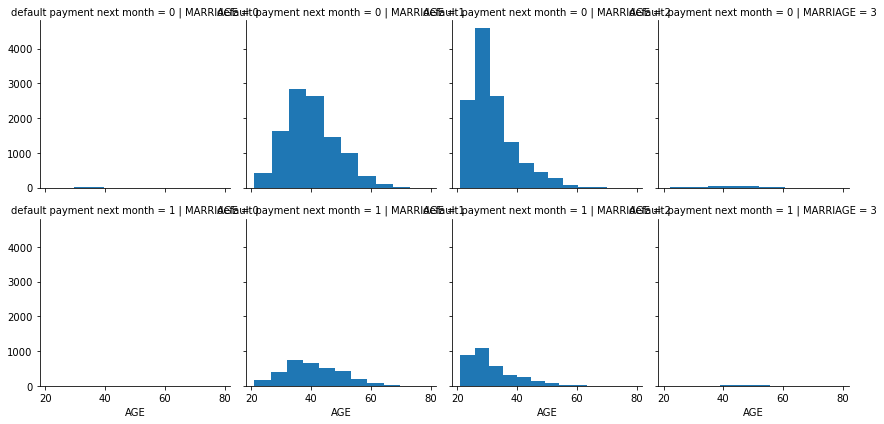

In [16]:
g = sns.FacetGrid(df, row='default payment next month', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

- From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

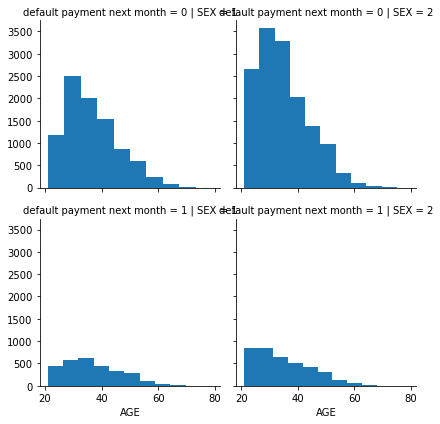

In [17]:
g = sns.FacetGrid(df, row='default payment next month', col='SEX')
g = g.map(plt.hist, 'AGE')

- It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

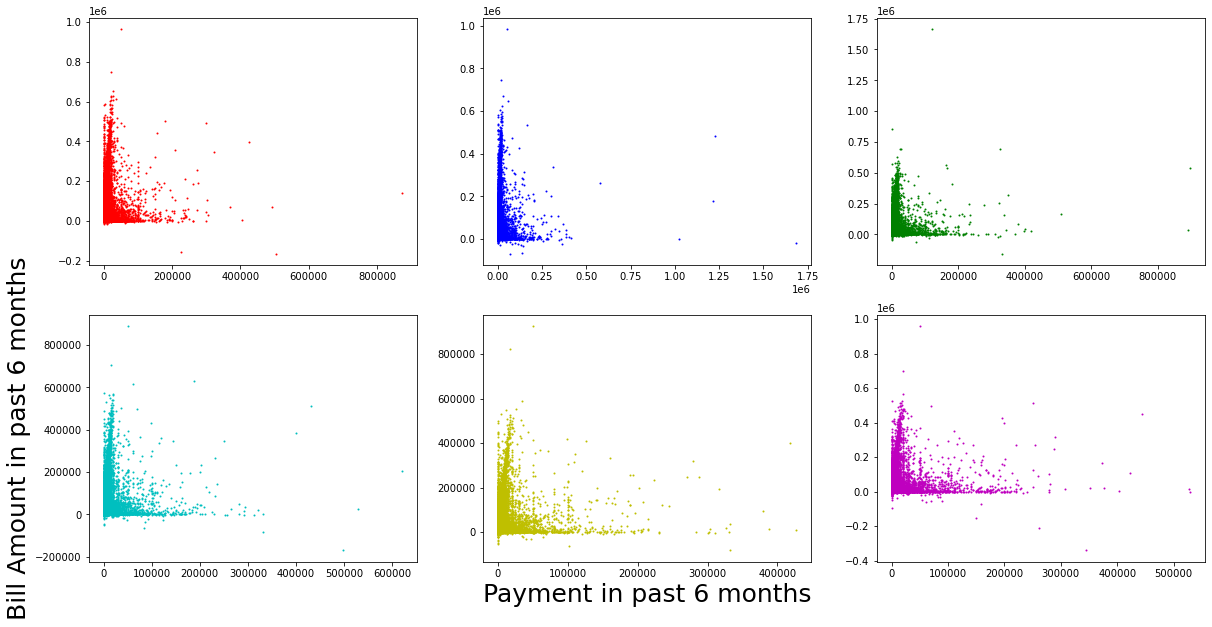

In [18]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

- Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

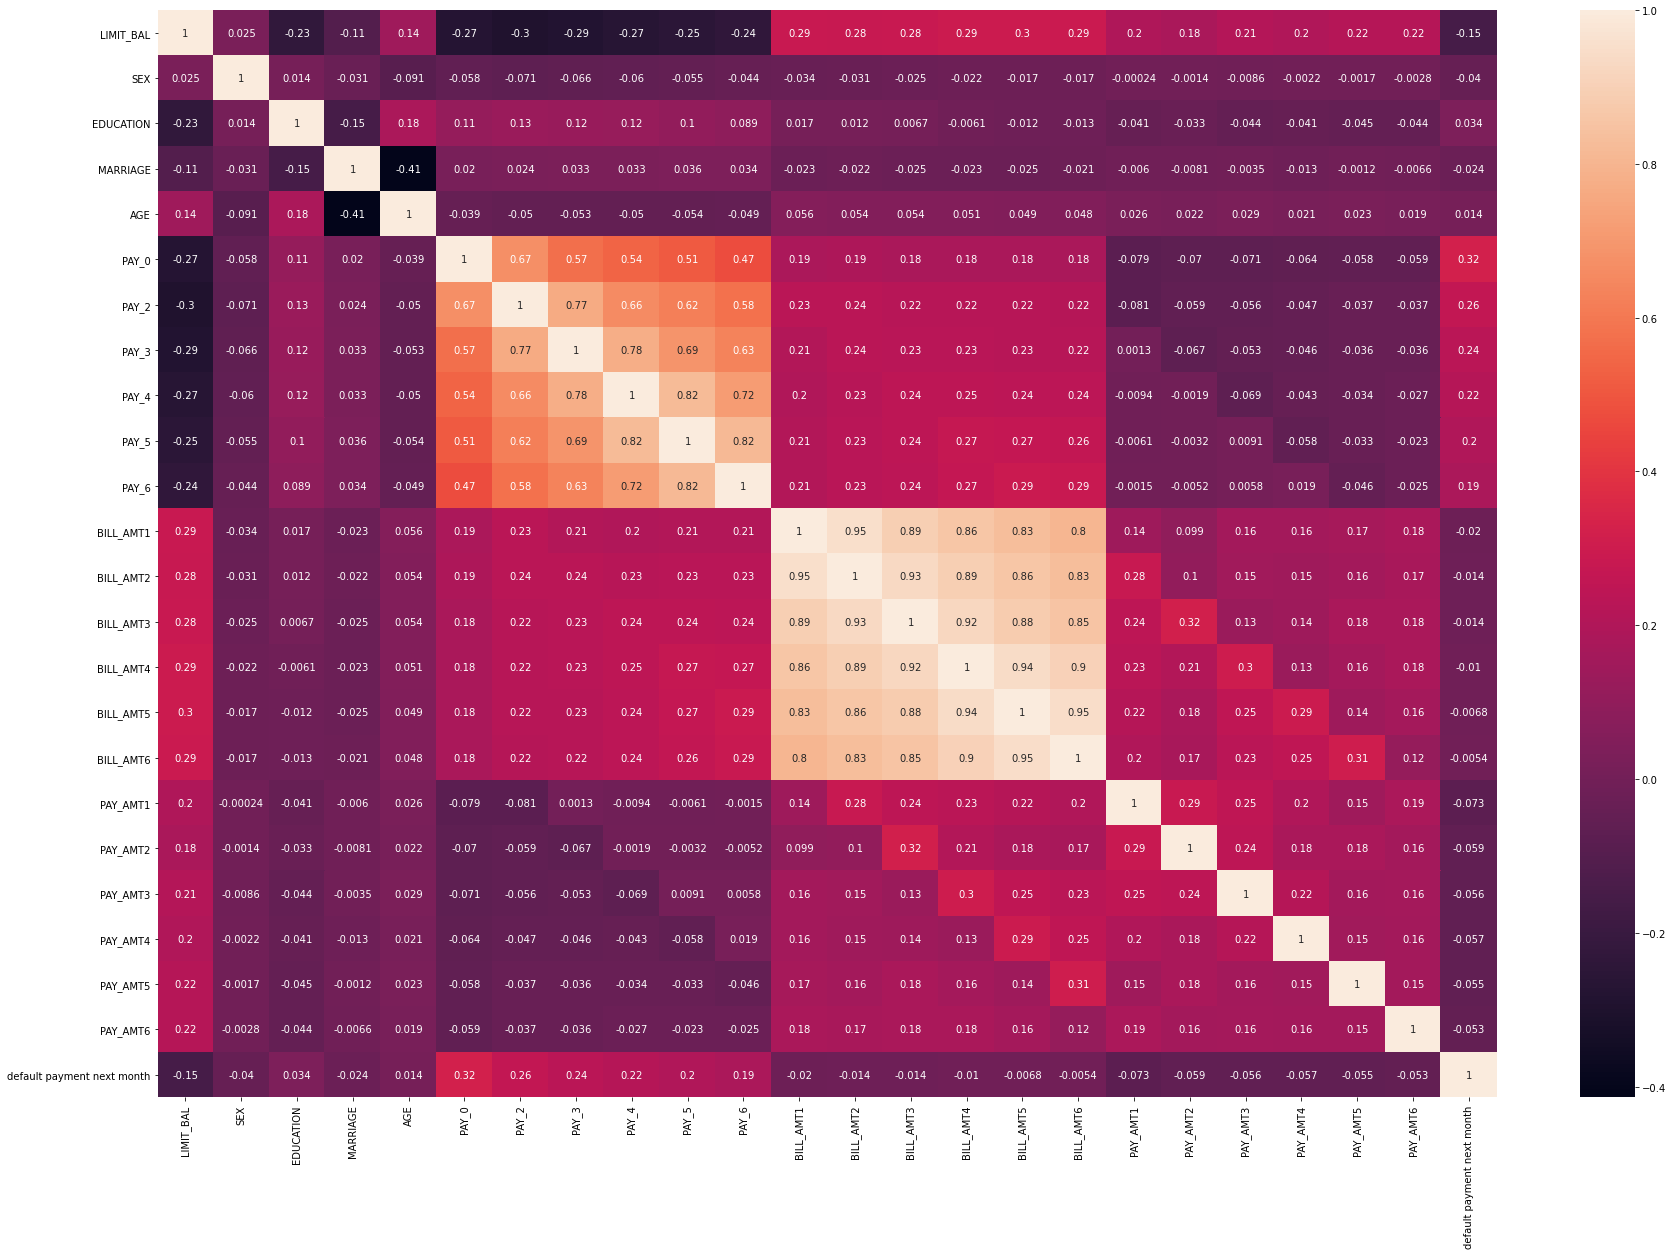

In [19]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:>

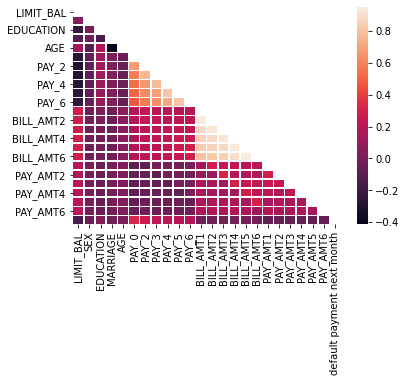

In [20]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask,  linewidths = .5 )#, annot = True)

In [21]:
# Filter for correlation value greater than threshold
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.7) & (sort < 1)])

BILL_AMT1  BILL_AMT2    0.951484
BILL_AMT2  BILL_AMT1    0.951484
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT5  BILL_AMT6    0.946197
BILL_AMT4  BILL_AMT5    0.940134
BILL_AMT5  BILL_AMT4    0.940134
BILL_AMT3  BILL_AMT2    0.928326
BILL_AMT2  BILL_AMT3    0.928326
BILL_AMT4  BILL_AMT3    0.923969
BILL_AMT3  BILL_AMT4    0.923969
BILL_AMT6  BILL_AMT4    0.900941
BILL_AMT4  BILL_AMT6    0.900941
           BILL_AMT2    0.892482
BILL_AMT2  BILL_AMT4    0.892482
BILL_AMT1  BILL_AMT3    0.892279
BILL_AMT3  BILL_AMT1    0.892279
           BILL_AMT5    0.883910
BILL_AMT5  BILL_AMT3    0.883910
BILL_AMT1  BILL_AMT4    0.860272
BILL_AMT4  BILL_AMT1    0.860272
BILL_AMT2  BILL_AMT5    0.859778
BILL_AMT5  BILL_AMT2    0.859778
BILL_AMT6  BILL_AMT3    0.853320
BILL_AMT3  BILL_AMT6    0.853320
BILL_AMT6  BILL_AMT2    0.831594
BILL_AMT2  BILL_AMT6    0.831594
BILL_AMT1  BILL_AMT5    0.829779
BILL_AMT5  BILL_AMT1    0.829779
PAY_5      PAY_4        0.819835
PAY_4      PAY_5        0.819835
PAY_5     

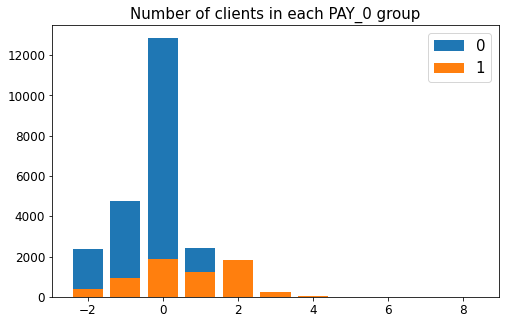

In [22]:

PAY_0_0 = (df.PAY_0[df['default payment next month'] == 0].value_counts())
PAY_0_1 = (df.PAY_0[df['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(PAY_0_0.index, PAY_0_0.values, label='0')
plt.bar(PAY_0_1.index, PAY_0_1.values, label='1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each PAY_0 group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

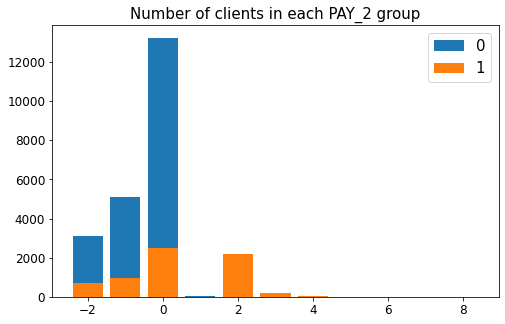

In [23]:
PAY_2_0 = (df.PAY_2[df['default payment next month'] == 0].value_counts())
PAY_2_1 = (df.PAY_2[df['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(PAY_2_0.index, PAY_2_0.values, label='0')
plt.bar(PAY_2_1.index, PAY_2_1.values, label='1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each PAY_2 group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

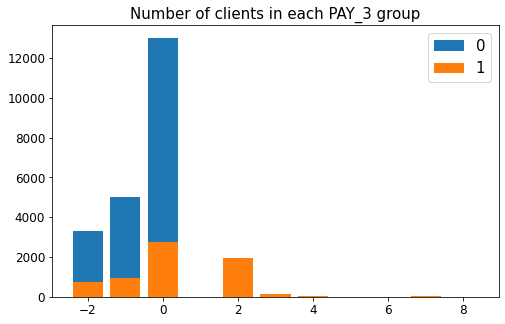

In [24]:
PAY_3_0 = (df.PAY_3[df['default payment next month'] == 0].value_counts())
PAY_3_1 = (df.PAY_3[df['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(PAY_3_0.index, PAY_3_0.values, label='0')
plt.bar(PAY_3_1.index, PAY_3_1.values, label='1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each PAY_3 group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

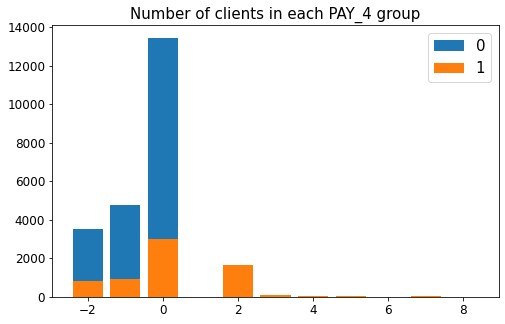

In [25]:
PAY_4_0 = (df.PAY_4[df['default payment next month'] == 0].value_counts())
PAY_4_1 = (df.PAY_4[df['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(PAY_4_0.index, PAY_4_0.values, label='0')
plt.bar(PAY_4_1.index, PAY_4_1.values, label='1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each PAY_4 group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

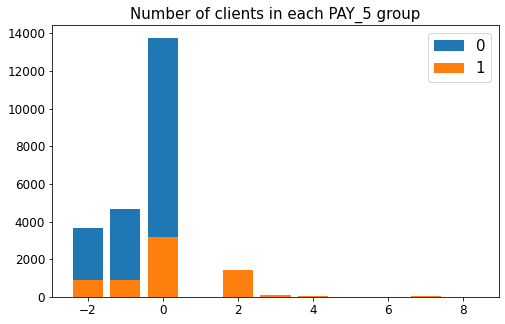

In [26]:
PAY_5_0 = (df.PAY_5[df['default payment next month'] == 0].value_counts())
PAY_5_1 = (df.PAY_5[df['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(PAY_5_0.index, PAY_5_0.values, label='0')
plt.bar(PAY_5_1.index, PAY_5_1.values, label='1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each PAY_5 group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

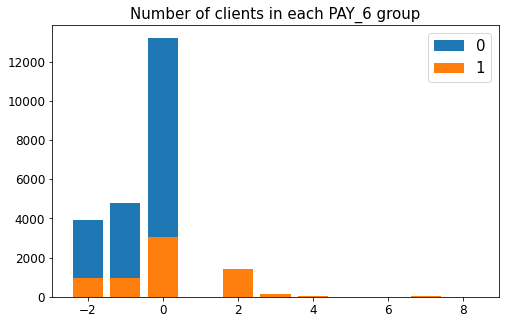

In [27]:
PAY_6_0 = (df.PAY_6[df['default payment next month'] == 0].value_counts())
PAY_6_1 = (df.PAY_6[df['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(PAY_6_0.index, PAY_6_0.values, label='0')
plt.bar(PAY_6_1.index, PAY_6_1.values, label='1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each PAY_6 group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

Most customers are duly paying their credit card bills. And it's pretty clear that their likelihood of default are much lower than the rest.

Since there are only a few customers with 4+ months of delay in all PAY_X features, we could make a new analysis with them all together just to have the average default of a more significant group.

- No nan value present in dataset
- We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment.
- `SEX`, `EDUCATION`, `MARRIAGE`, `PAY_0`, `PAY_2`, `PAY_3`,`PAY_4`, `PAY_5`, `PAY_6`and `default payment next month` are categorical columns
- In `EDUCATION` cloumn 4,5,6,0 represent same thing **other/Unknown** they could be combined as one.
- In `MARRIAGE` cloumn 3,0 represent same thing **other** they could be combined as one.
- `PAY_0`,`PAY_2`, `PAY_3`,`PAY_4`, `PAY_5`, `PAY_6` contain non defined values like 0,-2 they should be fixed
- Marital status (3 = divorce; 0=others)
- PAY_AMTX: (-2 = No consumption; -1 = Paid in full; 0 = The use of revolving credit
- imbalaced dataset, 1(Yes) is more in taget column
- mostly all columns contain outliers
- gender ratio is 60% female and 40% male
- 20% of women's have default payment next month where as 24% of men's have default payment next month.
- 46% are university, 35% graduate school, 16% are high school students and rest other
- 26% of university have default payment next month
- 19% graduate school have default payment next month and 25.1% of high school have default payment next month
- 53.3% are single, 45% married and rest other
- 72.42% of people are of age group 20-40 whereas 26.67% belong to 41-60 group and rest 61-80 are 0.91%

## Feature Selection

In [30]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [31]:
X = df.drop(labels= ['default payment next month'], axis = 1)
y = df['default payment next month']

In [32]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [34]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 23
selected features: 7
features with coefficients shrank to zero: 3


In [35]:
selected_feat

Index(['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [36]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
df.to_csv('data/cleaned_Data.csv', index=False)